In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Simply linear regresion
#ref: Numerical Recipes

Problem: fit a straight-line model to Stokes I vs StokesQUV

$S_j(x) = a + bS_I(x)$

where $S_I$ is Stokes I, $S_j(x)$ represents Stokes Q,U or V and $x$ represents valid pixels (npx) in the image. 

This linear regression problem can be solved analyticaly.

This being said, the solution for a and b is:

$$
 a = \frac{S_{xx}S_y - S_xS_{xy}}{\Delta} \,\,\,\,\,\, b = \frac{SS_{xy}-S_xS_y}{\Delta} \,\,\,\,\,\, \Delta = SS_{xx} - (S_x^2)
$$
with
$$
 S_x = \sum_{i=1}^{npx}S_I(i) \,\,\,\,\,\, S_y = \sum_{i=1}^{npx}S_j(i)  \,\,\,\,\,\, S_{xx} = \sum_{i=1}^{npx}S_I^2(i)  \,\,\,\,\,\, S_{xy} = \sum_{i=1}^{npx}S_I(i) S_j(i) 
$$
The value of $S$ is determined from the noise in the data but it can be safelly set to 1. If no information about noise, these equations are modified sligtly to avoid round-off errors.

In [69]:
def coeficients(x, y):
    #assumes input is 1D vector (flatten() or whatever)
    n_points = len(x)
    #Calculate S_x, S_y, S_xx, S_xy
    S_x = sum(x)
    S_y = sum(y)
    S_xx = sum(x*x) - S_x*S_x / n_points
    S_xy = sum(y*x) - S_x*S_y / n_points
    #Calculate off-ser and slope
    b = S_xy / S_xx
    a = (S_y - b*S_x)/ n_points
    return (a,b)
 

Coefficients:
off_set = 31.070892610096124 
slope = 4.282255009503875


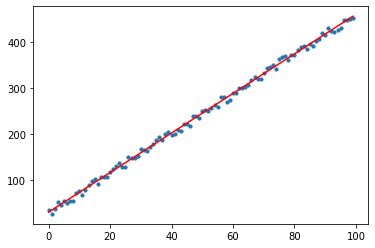

In [70]:
x = np.arange(0,100) 
y = 20.3 + x * 4.3 + 20*np.random.rand(len(x))

(off_set, slope) = coeficients(x, y)
print("Coefficients:\noff_set = {} \nslope = {}".format(off_set, slope))
plt.scatter(x, y,marker = "o", s = 10)
plt.plot(x, off_set + slope*x, color = "red")
plt.show()